In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
(x_train, _), (x_test, _) = mnist.load_data()

In [19]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

In [24]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

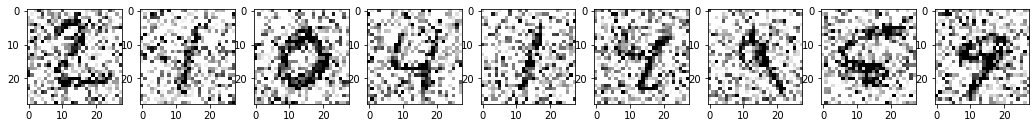

In [25]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

In [27]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 8)         

In [29]:
model.fit(x_train_noisy, x_train, epochs=100, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

Epoch 1/100


2022-06-24 12:24:54.503393: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-06-24 12:24:54.609010: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


235/235 [==============================] - 65s 273ms/step - loss: 0.0543 - val_loss: 0.0422
Epoch 2/100
235/235 [==============================] - 68s 288ms/step - loss: 0.0385 - val_loss: 0.0349
Epoch 3/100
235/235 [==============================] - 61s 260ms/step - loss: 0.0335 - val_loss: 0.0314
Epoch 4/100
235/235 [==============================] - 60s 254ms/step - loss: 0.0307 - val_loss: 0.0294
Epoch 5/100
235/235 [==============================] - 58s 246ms/step - loss: 0.0290 - val_loss: 0.0279
Epoch 6/100
235/235 [==============================] - 58s 245ms/step - loss: 0.0278 - val_loss: 0.0267
Epoch 7/100
235/235 [==============================] - 59s 249ms/step - loss: 0.0267 - val_loss: 0.0260
Epoch 8/100
235/235 [==============================] - 58s 247ms/step - loss: 0.0260 - val_loss: 0.0253
Epoch 9/100
235/235 [==============================] - 58s 246ms/step - loss: 0.0254 - val_loss: 0.0250
Epoch 10/100
235/235 [==============================] - 64s 271ms/step - los

235/235 [==============================] - 60s 253ms/step - loss: 0.0178 - val_loss: 0.0174
Epoch 80/100
235/235 [==============================] - 60s 255ms/step - loss: 0.0178 - val_loss: 0.0176
Epoch 81/100
235/235 [==============================] - 59s 253ms/step - loss: 0.0177 - val_loss: 0.0176
Epoch 82/100
235/235 [==============================] - 59s 252ms/step - loss: 0.0178 - val_loss: 0.0176
Epoch 83/100
235/235 [==============================] - 60s 256ms/step - loss: 0.0177 - val_loss: 0.0176
Epoch 84/100
235/235 [==============================] - 60s 254ms/step - loss: 0.0177 - val_loss: 0.0174
Epoch 85/100
235/235 [==============================] - 60s 254ms/step - loss: 0.0176 - val_loss: 0.0176
Epoch 86/100
235/235 [==============================] - 59s 252ms/step - loss: 0.0176 - val_loss: 0.0175
Epoch 87/100
235/235 [==============================] - 60s 254ms/step - loss: 0.0176 - val_loss: 0.0174
Epoch 88/100
235/235 [==============================] - 60s 254ms/st

In [30]:
model.evaluate(x_test_noisy, x_test)


313/313 [==============================] - 3s 9ms/step - loss: 0.0171


0.017136694863438606

In [31]:
model.save('denoising_autoencoder.model')

2022-06-24 15:22:15.893528: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: denoising_autoencoder.model/assets


In [32]:
no_noise_img = model.predict(x_test_noisy)

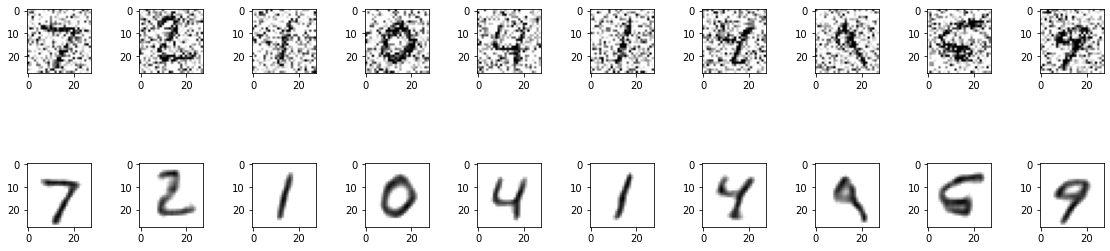

In [33]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()